<h1>Credit Card Routing for Online Purchase via Predictive Modelling</h1>

<h1>1. Introduction</h1>

"Online retail business" implies a business process in which customers have a plethora of options in searching for, selecting, and purchasing products, information, and services over the internet.

Most retailers sell their goods online, and this explains why online retail business is simply a form of electronic commerce that enables consumers to buy goods or services or shop directly from their phones, tabs, laptops, or other internet-connected devices anywhere in the world.

<h2>1.1 Methodology</h2>

The Team Data Science Process (TDSP) will be used to for the case study. The process includes 4 phases (steps) which include further generic tasks: 

<ul>
<li>Business Understanding</li> 
<li>Data Acquisition and Understanding</li> 
<li>Modeling</li>
<li>Deployment</li>
</ul>

The generic tasks describe what needs to be done in a phase before moving on to the next one.

<img width='800' src="https://learn.microsoft.com/en-us/azure/architecture/data-science-process/media/overview/tdsp-lifecycle2.png"/>

<h2>1.2 Business Understanding</h2>

Over the past decade, more and more payment options have become available for customers to make online payments, making them more convenient than ever. Due to this trend, any business can benefit massively from offering multiple payment options to its customers. This helps in acquiring new customers, as well as retaining current ones. However, maintaining a growing number of payment options can create a lot of extra costs, labor, and security issues. This is where Payment Service Providers (PSPs) can help.

PSPs (also called Merchant Service Providers) are third-party companies that help business owners accept a wide range of online payment methods, like online banking, credit cards, debit cards, e-wallets, cash cards, and more. Basically, they make sure your transactions make it from point A to point B, safely and securely.

PSPs see to it that transactions are completed — from the start, when a customer enters their details and initiates a payment, to finish, when you receive it.

<h3>1.2.1 Problem definition</h3>

Every day, businesses face more and more pressure to reduce costs, reduce process times and increase profit. 

Online credit card payments are performed via so-called payment service providers, referred to as “PSPs”. The current routing logic is manual and rule-based. The company has contracts with four different PSPs and pays transaction fees for every single payment.

Over the past year the Online retail have encountered a high failure rate of online credit card payments. The company loses a lot of money due to failed transactions and customers become increasingly unsatisfied with the online shop. 

<h3>1.2.2 Main Goal And Specific Objective</h3>

Business decision-makers, however, hope that with predictive modelling and with your help, a smarter way of routing a PSP to a transaction is possible.

1. Analyze the problem root cause. How success rate is changing over time?
2. Build a model that increase the payment success rate by finding the best possible PSP for each transaction and at the same time keep the transaction fees low.

<h3>1.2.3 Tools</h3>

The tools used for the project are: Jupiter Notebook, Python, pandas, NumPy, matplotlib, seaborn, scikit-learn.

<h1>2. Data Understanding</h1>

The Data understanding phase is where we focus on understanding the data we had to support the Business Understanding and solve the business problem.

<h2>2.1 Data Sources</h2>

There are two data sources: List of credit card transactions for DACH countries (Germany, Switzerland, Austria) for January and February 2019 "PSP_Jan_Feb_2019.csv" and List of payments service providers (PSPs) and service fees "Service_fees.csv". 

The data are collected from online purchasing. 

In [1]:
import pandas as pd
transactions = pd.read_csv('datasets/PSP_Jan_Feb_2019.csv')
service_fees = pd.read_csv('datasets/Service_fees.csv')

<h2>2.2 Describe data</h2>

Now we can see all the general information of the dataset. First we will see the first 5 rows of the dataset. 

In [2]:
transactions.head()

,id,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [3]:
print(transactions.shape)

(50410, 8)


The dataset has 50410 entries and 8 columns:
    
Feature | Variable Type | Data Type | Description 
:--------: | ------- | :-------: | -------  
`id` | continuous |  int  | index
`tmsp` | datetime |  timestamp  | timestamp of transaction
`country` | categorical | string | country of transaction (Germany, Switzerland, Austria)
`amount` | continuous | float | transaction amount (euro)
`success` | categorical | boolean | 1 - payment is successful, 0 payment has failed
`PSP` | categorical | string | name of payments service provider (Moneycard, Goldcard, UK_Card, Simplecard) 
`3D_secured` | categorical | boolean | 1 - customer is 3D identified, 0 customer is Not 3D identified
`card` | categorical | string | credit card provider (Master, Visa, Diners)
    

<h2>2.3 Verify data quality</h2>

Are there any missing or duplicate values variables? There are no missing or duplicate values. 

In [4]:
print(transactions.info())
print('There are:', transactions[transactions.duplicated()==True].shape[0],'data duplicate.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          50410 non-null  int64 
 1   tmsp        50410 non-null  object
 2   country     50410 non-null  object
 3   amount      50410 non-null  int64 
 4   success     50410 non-null  int64 
 5   PSP         50410 non-null  object
 6   3D_secured  50410 non-null  int64 
 7   card        50410 non-null  object
dtypes: int64(4), object(4)
memory usage: 3.1+ MB
None
There are: 0 data duplicate.


<h2>2.4 Explore data</h2>

<h3>2.4.1 Categorical Features</h3>

We will start analyzing the categorical feature moreover we want the see if there is any impact on success rate. 

<h4>2.4.1.1 Transactions and success rate by Country</h4>

59.97% of the transacions are from Germany, 20.51% are from Switzerland and 19.52% from Austria. All the 3 countries have the almost same success rate: around 20%. There is no corelation between success rate and country.

,country,count,success,percent
0,Germany,30233,0.201369,20.14
1,Switzerland,10338,0.205746,20.57
2,Austria,9839,0.204594,20.46


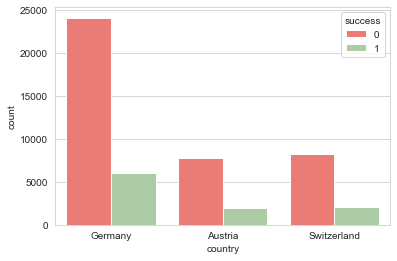

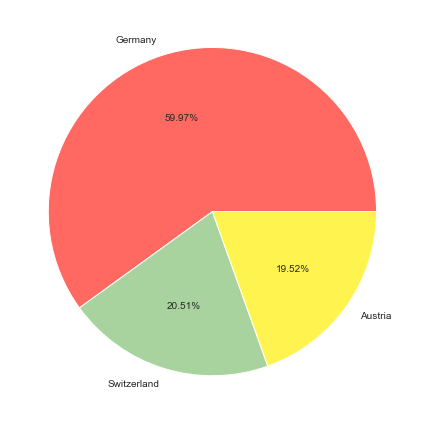

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

Palette = ["#ff6961", "#a9d39e",'#fff44f','#74bbfb'] #define your preference
sns.set_style("whitegrid")
sns.set_palette(Palette) #use the list defined in the function

transactions_by_PSP = transactions.groupby('country')['country'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

sns.countplot(data=transactions, x="country", hue="success")

success_rate_by_PSP =  transactions.pivot_table(values="success",index="country").reset_index()
success_rate_by_PSP['percent'] = (success_rate_by_PSP['success'] * 100).round(2)
success_rate_by_PSP = success_rate_by_PSP.sort_values(by='percent',ascending=False)

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(transactions_by_PSP['count'],labels=transactions_by_PSP['country'], autopct='%.2f%%')
plt.tight_layout()

summary = pd.merge(transactions_by_PSP, success_rate_by_PSP, on="country", how="inner")
display(summary)

<h4>2.4.1.2 Transactions and success rate by PSP</h4>

52.49% of the transacions are from UK_Card, 24.69% are from Simplecard, 19.43% from Moneycard and 15.81% from Simplecard.

Goldcard have higest success rate: around 40.62%, Simplecard with 15.81% smaller rate. From the correlaction matrix we can see that there is a moderate negative relationship between number of transactions and success rate.

,PSP,count,success,percent
0,UK_Card,26459,0.194338,19.43
1,Simplecard,12446,0.158123,15.81
2,Moneycard,8297,0.218754,21.88
3,Goldcard,3208,0.406172,40.62


,count,percent
count,1.000000,-0.630477
percent,-0.630477,1.000000


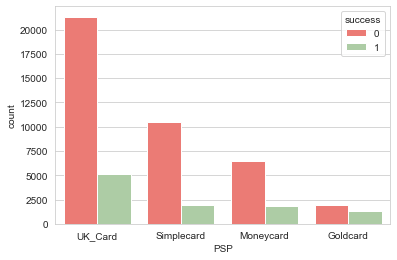

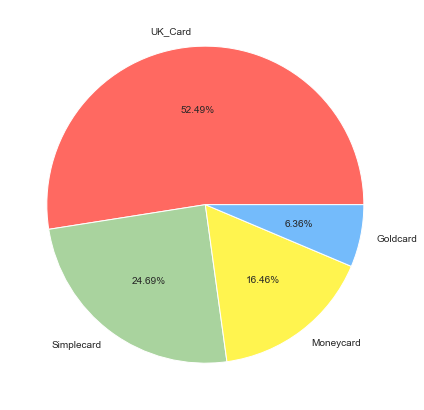

In [6]:
transactions_by_PSP = transactions.groupby('PSP')['PSP'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

success_rate_by_PSP =  transactions.pivot_table(values="success",index="PSP").reset_index()
success_rate_by_PSP['percent'] = (success_rate_by_PSP['success'] * 100).round(2)
success_rate_by_PSP = success_rate_by_PSP.sort_values(by='percent',ascending=False)

summary = pd.merge(transactions_by_PSP, success_rate_by_PSP, on="PSP", how="inner")
display(summary)
display(summary[['count','percent']].corr())

sns.countplot(data=transactions, x="PSP", hue="success")

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(transactions_by_PSP['count'],labels=transactions_by_PSP['PSP'], autopct='%.2f%%')
plt.tight_layout()

<h4>2.4.1.3 Transactions and success rate by 3D seccured</h4>

76.17% of the transacions doesn't have 3D secured customer. The transaction that have 3D secured customer have larger success rate 24.55% in comparison to others with success rate of 18.96%. 

,3D_secured,count,success,percent
0,0,38399,0.189562,18.96
1,1,12011,0.245525,24.55


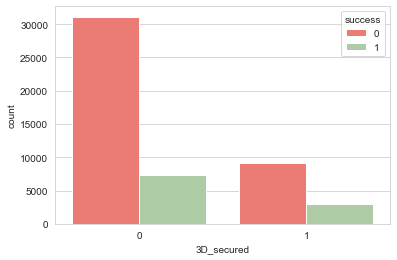

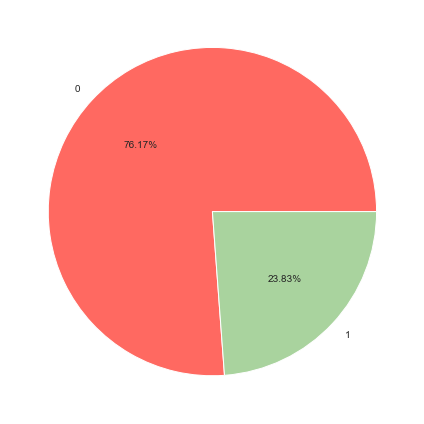

In [7]:
transactions_by_3D_secured = transactions.groupby('3D_secured')['3D_secured'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

success_rate_by_3D_secured =  transactions.pivot_table(values="success",index="3D_secured").reset_index()
success_rate_by_3D_secured['percent'] = (success_rate_by_3D_secured['success'] * 100).round(2)
success_rate_by_3D_secured = success_rate_by_3D_secured.sort_values(by='percent',ascending=False)

summary = pd.merge(transactions_by_3D_secured, success_rate_by_3D_secured, on="3D_secured", how="inner")
display(summary)

sns.countplot(data=transactions, x="3D_secured", hue="success")

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(transactions_by_3D_secured['count'],labels=transactions_by_3D_secured.index, autopct='%.2f%%')
#ax.set_title('Transactions by 3D_secured')
plt.tight_layout()

<h4>2.4.1.4 Transactions and success rate by card</h4>

57.53% of the transacions are done with Master, 23.09% Visa and 19.38% Dinners. There is no significant variation between success rates (low 19.39%, high 22.03%).

,card,count,success,percent
0,Master,29002,0.193883,19.39
1,Visa,11640,0.208505,20.85
2,Diners,9768,0.222973,22.30


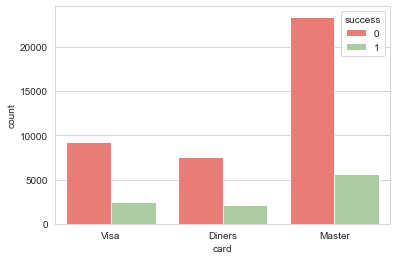

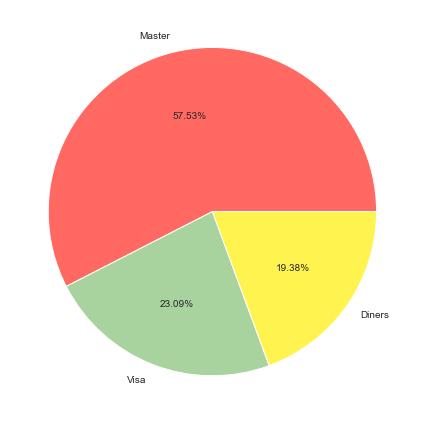

In [8]:
transactions_by_card = transactions.groupby('card')['card'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

success_rate_by_card =  transactions.pivot_table(values="success",index="card").reset_index()
success_rate_by_card['percent'] = (success_rate_by_card['success'] * 100).round(2)
success_rate_by_card = success_rate_by_card.sort_values(by='percent',ascending=False)

summary = pd.merge(transactions_by_card, success_rate_by_card, on="card", how="inner")
display(summary)

sns.countplot(data=transactions, x="card", hue="success")

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(transactions_by_card['count'],labels=transactions_by_card['card'], autopct='%.2f%%')
#ax.set_title('Transactions by card')
plt.tight_layout()

<h3>2.4.2  Numerical Features </h3>

Check the distribution of the amount.
Normal distributions have a skewness near 0 and a kurtosis near 3. Perform a Shapiro-Wilk Test in Python.

Null hypothesis of normality is rejected. The amount is not normaly distributed. This can pose a problem when modelling as most machine learning models require features to be normally distributed. Thus, we will perform StandardScaler() before using these features in our modelling.

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
25%        133.000000
50%        201.000000
75%        269.000000
max        630.000000
var       9268.823668
skew         0.188699
kurt        -0.335808
Name: amount, dtype: float64

Null hypothesis of normality is rejected.


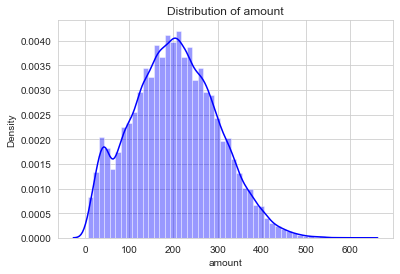

In [9]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(transactions['amount'], color='blue')
plt.title(f'Distribution of amount')

stats = transactions['amount'].describe()
stats.loc['var'] = transactions['amount'].var()
stats.loc['skew'] = transactions['amount'].skew()
stats.loc['kurt'] = transactions['amount'].kurtosis()
display(stats)

from scipy import stats
p_value = stats.shapiro(transactions['amount'])[1]

#Shapiro-Wilk Test in Python
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

<h3>2.4.3  Datetime Feature </h3>

How success rate has change over time? 
How is distriution on weekdays and time of the day?

The dataset contain transactions from two months: Jan 2019 and Feb 2019.
First record: '2019-01-01 00:01:11', while last '2019-02-28 23:48:19'.

success,date,failed,success,total,success_rate,failure_rate
0,2019-01-01,983,278,1261,22.05,77.95
1,2019-01-02,888,271,1159,23.38,76.62
2,2019-01-03,932,185,1117,16.56,83.44
3,2019-01-04,861,169,1030,16.41,83.59
4,2019-01-05,714,152,866,17.55,82.45


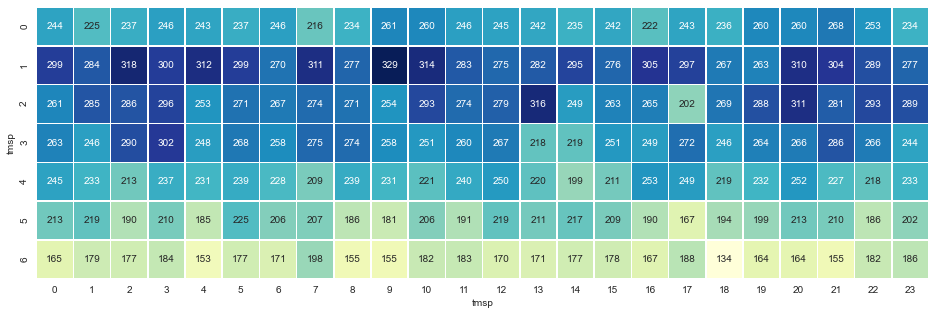

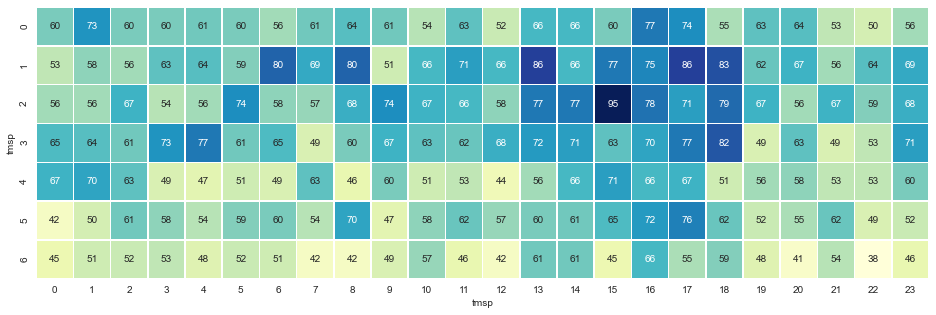

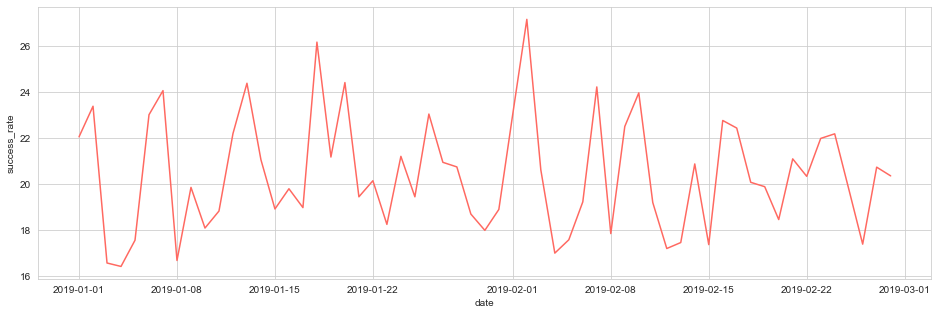

success,weekday,failed,success,total,success_rate,failure_rate
0,0,5835,1469,7304,20.11,79.89
1,1,7036,1627,8663,18.78,81.22
2,2,6590,1605,8195,19.59,80.41
3,3,6241,1555,7796,19.95,80.05
4,4,5529,1370,6899,19.86,80.14
5,5,4836,1398,6234,22.43,77.57
6,6,4115,1204,5319,22.64,77.36


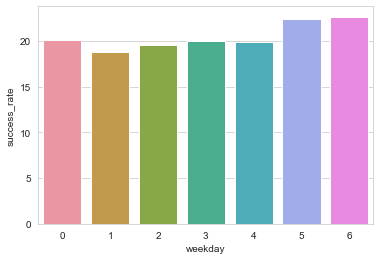

In [10]:
transactions['tmsp'] = pd.to_datetime(transactions['tmsp'])
transactions['date'] = transactions['tmsp'].dt.date
transactions['weekday'] = transactions['tmsp'].dt.weekday
transactions['hour'] = transactions['tmsp'].dt.hour

transactions_0 = transactions[transactions.success==0]
df_crosstab = pd.crosstab(transactions_0['tmsp'].dt.weekday, transactions_0['tmsp'].dt.hour)
plt.figure(figsize = (16,5))
sns.heatmap(df_crosstab, annot=True, fmt="d",cmap="YlGnBu", cbar=False, linewidths=.5)

transactions_1 = transactions[transactions.success==1]
df_crosstab = pd.crosstab(transactions_1['tmsp'].dt.weekday, transactions_1['tmsp'].dt.hour)
plt.figure(figsize = (16,5))
sns.heatmap(df_crosstab, annot=True, fmt="d",cmap="YlGnBu", cbar=False, linewidths=.5)

transactions_daily = pd.crosstab(transactions['date'], transactions['success']).reset_index()
transactions_daily.rename(columns={0: "failed", 1: "success"}, inplace = True)
transactions_daily['total'] = transactions_daily['failed'] + transactions_daily['success']
transactions_daily['success_rate'] = (transactions_daily['success'] / transactions_daily['total'] * 100).round(2)
transactions_daily['failure_rate'] = (transactions_daily['failed'] / transactions_daily['total'] * 100).round(2)

transactions_daily.set_index('date')
display(transactions_daily.head())

plt.figure(figsize = (16,5))
sns.lineplot(data=transactions_daily,x="date",y="success_rate")
ax.set(xticks=transactions_daily.date.values)
plt.show()

transactions_daily = pd.crosstab(transactions['weekday'], transactions['success']).reset_index()
transactions_daily.rename(columns={0: "failed", 1: "success"}, inplace = True)
transactions_daily['total'] = transactions_daily['failed'] + transactions_daily['success']
transactions_daily['success_rate'] = (transactions_daily['success'] / transactions_daily['total'] * 100).round(2)
transactions_daily['failure_rate'] = (transactions_daily['failed'] / transactions_daily['total'] * 100).round(2)

transactions_daily.set_index('weekday')
display(transactions_daily)

sns.barplot(data=transactions_daily,x="weekday",y="success_rate")
plt.show()

<h3>2.4.4 Target variable</h3>

From the above, we see huge class imbalance in the target variable. i.e., Only approximately 20.29% of the transactions are succesfull.

Thus, we must take care of this in the modelling (e.g., apply re-sampling technique) and ensure that huge class imbalance do not negatively impact our modelling performance.

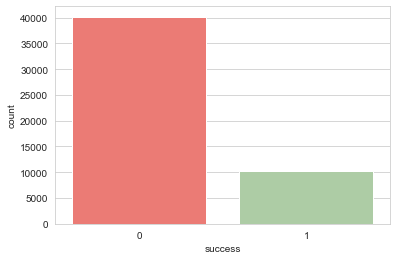

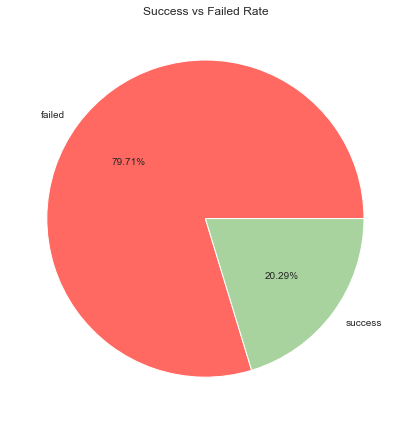

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=transactions, x="success")

fig, ax = plt.subplots(figsize=(6, 6))
rates = transactions.groupby('success')['success'].agg(['count'])
ax.pie(rates['count'], labels=['failed','success'], autopct='%.2f%%')
ax.set_title('Success vs Failed Rate')
plt.tight_layout()

<h1>3. Data Preparation</h1>

After you understand the data you have, it is time for the Data Preparation. This phase is what we did to prepare the data for the modeling phase. 

<h2>3.1 Feature Engineering</h2>

Create a new data from existing data. Create time features. Create new feature from Service fees. 

Total amount of transactions fees is: 88544.0. <b>The goal is to keep this fee low.</b> 
 - 49045.0 on failed transactions 
 - 39499.0 on succesfull transactions 
 
The most failed transaction have fee: 1.0
The most sucess transaction have fee: 3.0

In [12]:
transactions['weekday'] = transactions['tmsp'].dt.weekday
transactions['hour'] = transactions['tmsp'].dt.hour

In [13]:
display(service_fees)
display(transactions.head())

,name,fee_success,fee_failed
0,Moneycard,5,2.0
1,Goldcard,10,5.0
2,UK_Card,3,1.0
3,Simplecard,1,0.5


,id,tmsp,country,amount,success,PSP,3D_secured,card,date,weekday,hour
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,2019-01-01,1,0
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,2019-01-01,1,0
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,2019-01-01,1,0
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,2019-01-01,1,0
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,2019-01-01,1,0


<h2>3.2 Data Formatting</h2>

Encoding categorical features. Standard Scaler transformation. 

First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called label encoding.

In [14]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in transactions.columns.to_numpy():
    # Compare if the dtype is object
    if transactions[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        transactions[col]=le.fit_transform(transactions[col])
        
display(transactions.head())

,id,tmsp,country,amount,success,PSP,3D_secured,card,date,weekday,hour
0,0,2019-01-01 00:01:11,1,89,0,3,0,2,0,1,0
1,1,2019-01-01 00:01:17,1,89,1,3,0,2,0,1,0
2,2,2019-01-01 00:02:49,1,238,0,3,1,0,0,1,0
3,3,2019-01-01 00:03:13,1,238,1,3,1,0,0,1,0
4,4,2019-01-01 00:04:33,0,124,0,2,0,0,0,1,0


<h2>3.3 Data Selection</h2>

Selecting the dataset, columns, and/or rows you would use. When you exclude data, make sure you have a valid explanation. The way you filter data should reflect the business question as well. Train test split.

Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

As expected, after scaling, all data now has mean 0, std deviation 1.

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split

transactions_data = transactions.drop(['id', 'tmsp','date'], axis=1)

# Create train and test sets
train, test = train_test_split(transactions_data, test_size=0.2, random_state=42)

In [16]:
# Train: X and y split
X_train = train.drop('success', axis=1)
y_train = train[['success']]
display(X_train.head())
display(y_train.head())

,country,amount,PSP,3D_secured,card,weekday,hour
31154,2,399,2,0,1,1,15
25663,1,260,2,1,1,3,4
30963,2,181,2,0,2,1,11
37731,1,217,2,0,1,1,23
15297,2,279,2,0,1,3,13


,success
31154,0
25663,0
30963,0
37731,0
15297,0


In [17]:
# Train: X and y split
X_test = test.drop('success', axis=1)
y_test = test[['success']]
display(X_test.head())
display(y_test.head())

,country,amount,PSP,3D_secured,card,weekday,hour
5087,0,215,3,0,1,5,14
22530,1,240,2,0,0,6,4
15518,2,382,3,1,1,3,20
3418,1,32,3,1,1,3,21
36168,0,211,3,0,1,0,8


,success
5087,0
22530,0
15518,0
3418,0
36168,0


In [18]:
# Import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler and use it to rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

display(rescaledX_train)

X_train_e_l_n = pd.DataFrame(data=rescaledX_train, index=X_train.index, columns=X_train.columns)    
X_test_e_l_n = pd.DataFrame(data=rescaledX_test, index=X_test.index, columns=X_test.columns) 

display(X_train_e_l_n.describe())

array([[ 1.5660541 ,  2.03758259, -0.24824634, ..., -0.05561389,
        -0.91902061,  0.50705327],
       [-0.01553034,  0.59686441, -0.24824634, ..., -0.05561389,
         0.12357709, -1.08248858],
       [ 1.5660541 , -0.22196103, -0.24824634, ...,  1.4773984 ,
        -0.91902061, -0.07096195],
       ...,
       [-0.01553034, -1.18589477,  0.81148464, ..., -1.58862618,
        -0.39772176, -0.35996956],
       [ 1.5660541 ,  1.43641961,  0.81148464, ...,  1.4773984 ,
        -0.91902061,  0.65155708],
       [ 1.5660541 ,  0.53467514,  0.81148464, ..., -0.05561389,
         0.64487594, -0.79348097]])

,country,amount,PSP,3D_secured,card,weekday,hour
count,4.032800e+04,4.032800e+04,4.032800e+04,4.032800e+04,4.032800e+04,4.032800e+04,4.032800e+04
mean,1.184730e-15,-3.055811e-17,2.712790e-17,9.842245e-16,4.429106e-16,-2.109217e-15,-1.125144e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.597115e+00,-2.035815e+00,-2.367708e+00,-5.601286e-01,-1.588626e+00,-1.440319e+00,-1.660504e+00
25%,-1.553034e-02,-7.194752e-01,-2.482463e-01,-5.601286e-01,-5.561389e-02,-9.190206e-01,-9.379848e-01
50%,-1.553034e-02,-1.466345e-02,8.114846e-01,-5.601286e-01,-5.561389e-02,1.235771e-01,-7.096195e-02
75%,-1.553034e-02,6.901483e-01,8.114846e-01,-5.601286e-01,-5.561389e-02,6.448759e-01,7.960609e-01
max,1.566054e+00,3.923991e+00,8.114846e-01,1.785304e+00,1.477398e+00,1.687474e+00,1.663084e+00


In [19]:
def model_run(model, clf, X=X_test, y=y_test):

    # Evaluate error rates and append to lists
    y_test_predict = clf.predict(X)
    auc = roc_auc_score(y, y_test_predict)
    precision =precision_score(y, y_test_predict)
    recall = recall_score(y, y_test_predict)
    accuracy = clf.score(X, y)

    # Print classification report
    print(f'== {model} - Classification report ==')
    print(classification_report(y, y_test_predict))
    
    # Plot confusion matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_test_predict)), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(f'{model}- Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')   
    plt.show()
    
    """
    # Plot ROC curve
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X)[:,1]
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
    plt.plot(fpr, tpr, marker='.', label=model)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model} - ROC curve')
    plt.annotate(f'AUC ={round(auc, 5)} ', xy=(0.7, 0.5),fontsize=12,)
    # show the legend
    plt.legend()    
    plt.show()
    
    # Plot precision recall curve
    precision_, recall_, _ = precision_recall_curve(y_test, y_pred_prob)
    # Random classifier is one which randomly predicts a class and is the ratio of the ones in the dataset
    random_clf = y_test[y_test==1].count() / len(y_test) #len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [random_clf, random_clf], linestyle='--', label='Average precision')
    plt.plot(recall_, precision_, marker='.', label=model)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model} - Precision recall curve')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    """

    return {'Model':model, \
            'Accuracy': round(accuracy,5) , \
            'Precision':round(precision,5) , \
            'Recall':round(recall,5)}

<h1>4. Modeling</h1>

Essentially, predicting if a credit card transations will be successfull or not is a classification task. Our dataset contains more instances that correspond to "Failure" status than instances corresponding to "Success" status. Specifically, out of 50410 instances, there are 10228 (20.29%) applications that got denied and 40182 (70.71%) transactions that got approved.

This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the transaction with respect to these statistics.

Which model should we pick? A question to ask is: are the features that affect the credit card transaction success decision process correlated with each other? Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).

<h2>4.1 Logistic Regression</h2>

== Logistic regression - Classification report ==
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      8162
           1       0.00      0.00      0.00      1920

    accuracy                           0.81     10082
   macro avg       0.40      0.50      0.45     10082
weighted avg       0.66      0.81      0.72     10082



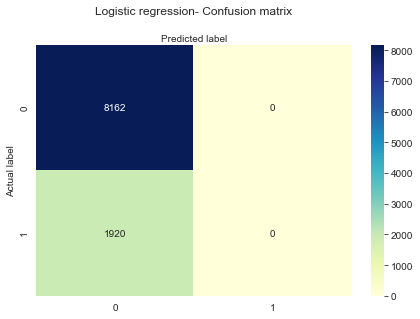

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from timeit import default_timer as timer
import time

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.utils import resample,shuffle
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

# Define list to store result 
final_result = list()
# Define list to store result 
final_model = list()

# Instantiate a LogisticRegression classifier with default parameter values
lrc = LogisticRegression()

# Fit logreg to the train set
lrc.fit(rescaledX_train,y_train)

#Display model performance
final_model.append(model_run('Logistic regression', lrc, X=rescaledX_test, y=y_test))

<h2>4.2 Gradient Boosting</h2>

== Gradient Boosting Classifier - Classification report ==
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      8162
           1       0.60      0.05      0.09      1920

    accuracy                           0.81     10082
   macro avg       0.71      0.52      0.49     10082
weighted avg       0.77      0.81      0.74     10082



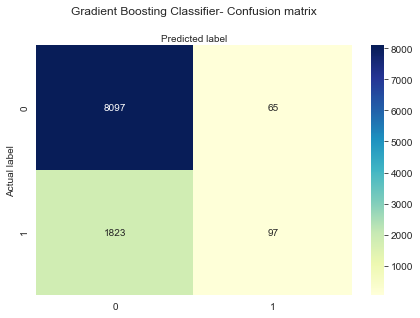

In [21]:
import matplotlib.pyplot as plt

# Instantiate a GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)

# Fit GradientBoostingClassifier to the train set
gbc.fit(rescaledX_train,y_train)

#Display model performance
final_model.append(model_run('Gradient Boosting Classifier', gbc, X=rescaledX_test, y=y_test))


<h2>4.2.3 Random forest</h2>

== Random Forest Classifier - Classification report ==
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8162
           1       0.66      0.03      0.06      1920

    accuracy                           0.81     10082
   macro avg       0.74      0.51      0.48     10082
weighted avg       0.78      0.81      0.74     10082



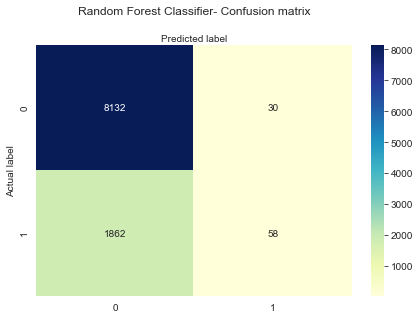

In [22]:
# Instantiate a RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=135, max_depth=6,criterion='gini', random_state=42,max_features='auto')

# Fit RandomForestClassifier to the train set
rfc.fit(rescaledX_train,y_train)

#Display model performance
final_model.append(model_run('Random Forest Classifier', rfc, X=rescaledX_test, y=y_test))

In [23]:
# Print model label
final_model_df = pd.DataFrame(final_model)
final_model_df.set_index('Model', inplace=True)

display(final_model_df)

,Accuracy,Precision,Recall
Model,,,
Logistic regression,0.80956,0.00000,0.00000
Gradient Boosting Classifier,0.81274,0.59877,0.05052
Random Forest Classifier,0.81234,0.65909,0.03021


<h1>5. Evaluation</h1>

,country,amount,PSP,3D_secured,card,weekday,hour
0,1,89,3,0,2,1,0
1,1,89,3,0,2,1,0
2,1,238,3,1,0,1,0
3,1,238,3,1,0,1,0
4,0,124,2,0,0,1,0


,success
0,0
1,1
2,0
3,1
4,0


Mean f1: 0.768
Mean recall: 0.778
Mean precision: 0.759


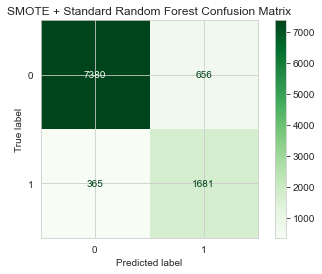

In [29]:
#Importing essential libraries
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

y = transactions[['success']]
X = transactions.drop(['id', 'tmsp','date','success'], axis=1)

#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.2, stratify=over_y)
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)

== Random Forest Classifier SMOTE_SRF - Classification report ==
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      8036
           1       0.72      0.82      0.77      2046

    accuracy                           0.90     10082
   macro avg       0.84      0.87      0.85     10082
weighted avg       0.91      0.90      0.90     10082



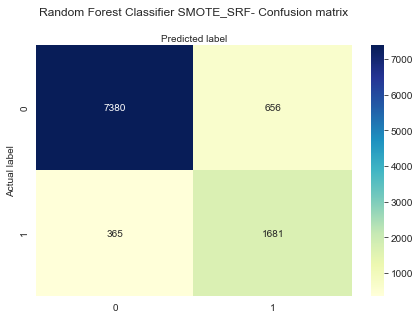

In [30]:
#Display model performance
final_model.append(model_run('Random Forest Classifier (SMOTE)', SMOTE_SRF, X=X_test, y=y_test))

In [31]:
# Print model label
final_model_df = pd.DataFrame(final_model)
final_model_df.set_index('Model', inplace=True)

display(final_model_df)

,Accuracy,Precision,Recall
Model,,,
Logistic regression,0.80956,0.00000,0.00000
Gradient Boosting Classifier,0.81274,0.59877,0.05052
Random Forest Classifier,0.81234,0.65909,0.03021
Random Forest Classifier SMOTE_SRF,0.89873,0.71930,0.82160


<h1>6. Deployment</h1>